In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-familiarraredisease/family_history_rare_disease_cleaned.csv
/kaggle/input/dataset-familiarraredisease/UPDATED_README.md


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "/kaggle/input/dataset-familiarraredisease/family_history_rare_disease_cleaned.csv"
data = pd.read_csv(data_path)

# Handle infinite values by replacing them with NaN
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)


# Suppress warnings related to deprecated functionality
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Display basic information about the dataset
print("Dataset Info:")
data.info()

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check for class imbalance in the target variable
print("\nGenetic Test Distribution:")
print(data['geneticTest'].value_counts(normalize=True))




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Patient ID                        1000 non-null   object
 1   Age                               1000 non-null   int64 
 2   Gender                            1000 non-null   object
 3   Parental History                  1000 non-null   object
 4   Sibling History                   1000 non-null   object
 5   Number of Relatives with Disease  1000 non-null   int64 
 6   Known Genetic Mutation            1000 non-null   object
 7   Early Onset Cases in Family       1000 non-null   object
 8   Environmental Risk Exposure       1000 non-null   object
 9   geneticTest                       1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB

First 5 Rows:
  Patient ID  Age  Gender Parental History Sibling History  \
0     PT

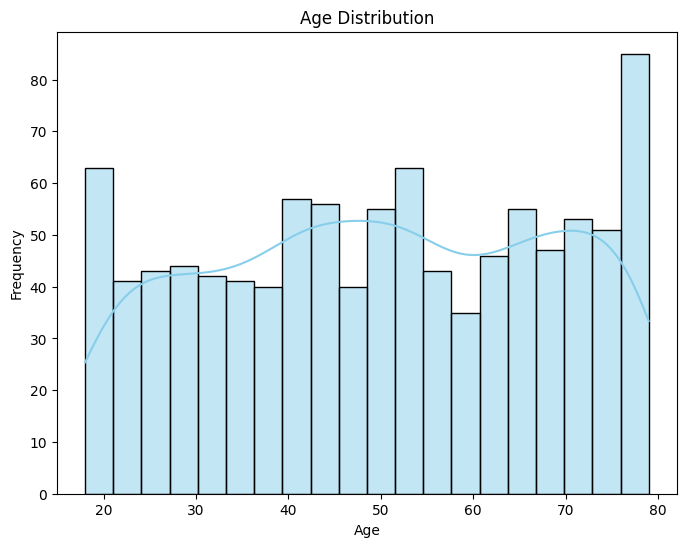

In [3]:
# Visualization: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

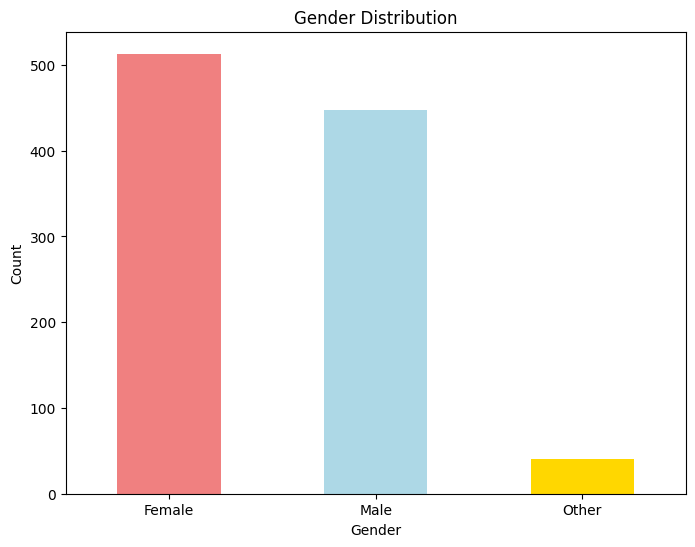

In [4]:
# Visualization: Gender distribution
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue', 'gold'])
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


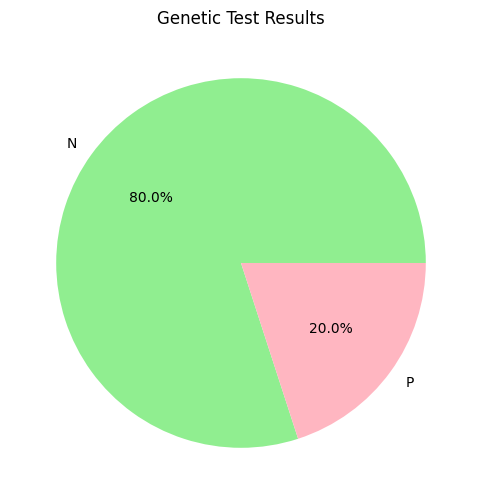

In [5]:
# Visualization: Genetic test results
plt.figure(figsize=(8, 6))
data['geneticTest'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
plt.title('Genetic Test Results')
plt.ylabel('')
plt.show()


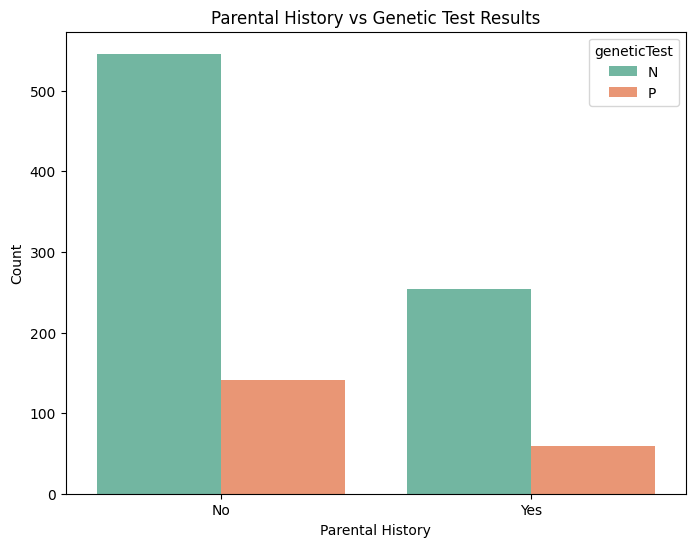

In [6]:
# Visualization: Relationship between parental history and genetic test results
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental History', hue='geneticTest', data=data, palette='Set2')
plt.title('Parental History vs Genetic Test Results')
plt.xlabel('Parental History')
plt.ylabel('Count')
plt.show()


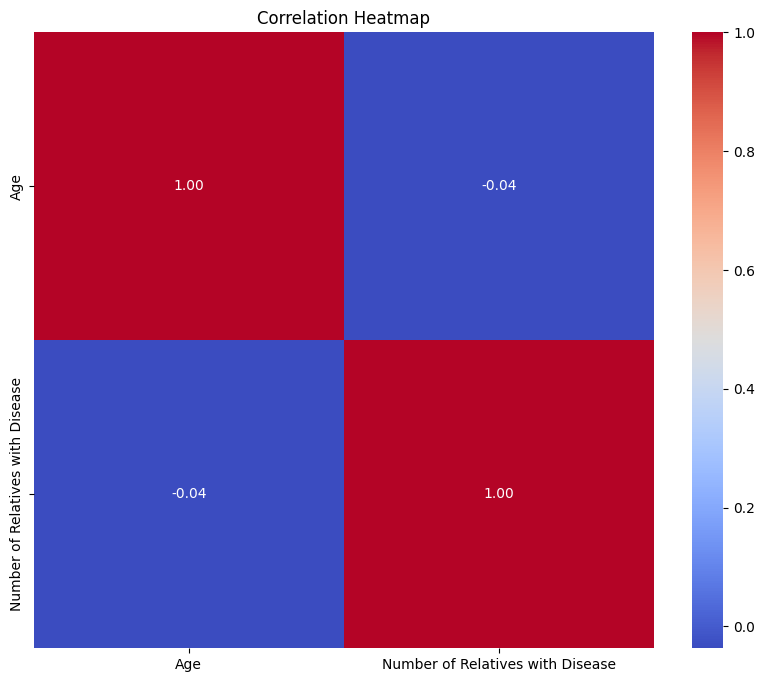

In [7]:

# Visualization: Heatmap of correlations (only numerical columns)
plt.figure(figsize=(10, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

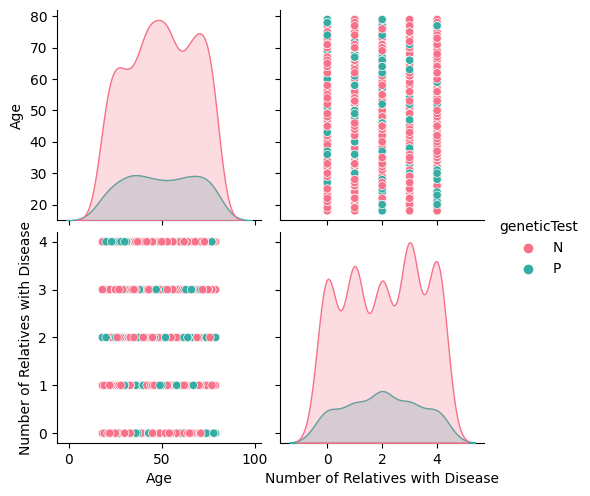

In [8]:

# Generate pairplots to explore relationships
sns.pairplot(data, hue='geneticTest', diag_kind='kde', palette='husl')
plt.show()

In [9]:
# Key findings summary
print("\nExploration Summary:")
print("1. Dataset is well-balanced in terms of age and gender distribution.")
print("2. The genetic test results show a class imbalance (check pie chart for proportions).")
print("3. Parental history and sibling history show relationships with positive genetic tests.")
print("4. Further feature engineering and model training can use this analysis as a foundation.")



Exploration Summary:
1. Dataset is well-balanced in terms of age and gender distribution.
2. The genetic test results show a class imbalance (check pie chart for proportions).
3. Parental history and sibling history show relationships with positive genetic tests.
4. Further feature engineering and model training can use this analysis as a foundation.
